# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

training_file = './data/train.p'
testing_file = './data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

print('Data loaded!')


Data loaded!


---

## Step 1: Dataset Summary & Exploration

We provide the summary of the testing set by printing the number of training images, the image data format and number of classes. We also list traffic signs names for better understanding of the class labels.


In [2]:
### Data summary 
import numpy as np

# Number of training examples
n_train = len(X_train)
# Number of testing examples.
n_test = len(y_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

### Read sign names to a local dictionary
import csv
sign_names = {}
reader = csv.DictReader(open('signnames.csv'))
for i in reader:
    key = i['ClassId']
    value = i['SignName']
    sign_names[key] = value
    print('', key, value)


Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43
 0 Speed limit (20km/h)
 1 Speed limit (30km/h)
 2 Speed limit (50km/h)
 3 Speed limit (60km/h)
 4 Speed limit (70km/h)
 5 Speed limit (80km/h)
 6 End of speed limit (80km/h)
 7 Speed limit (100km/h)
 8 Speed limit (120km/h)
 9 No passing
 10 No passing for vehicles over 3.5 metric tons
 11 Right-of-way at the next intersection
 12 Priority road
 13 Yield
 14 Stop
 15 No vehicles
 16 Vehicles over 3.5 metric tons prohibited
 17 No entry
 18 General caution
 19 Dangerous curve to the left
 20 Dangerous curve to the right
 21 Double curve
 22 Bumpy road
 23 Slippery road
 24 Road narrows on the right
 25 Road work
 26 Traffic signals
 27 Pedestrians
 28 Children crossing
 29 Bicycles crossing
 30 Beware of ice/snow
 31 Wild animals crossing
 32 End of all speed and passing limits
 33 Turn right ahead
 34 Turn left ahead
 35 Ahead only
 36 Go straight or right
 37 G

To visualize the trainig dataset we plot for each class:
 - a label iwtht the count of each sign
 - first image in the set
We also plot the histogram with the number of images per class 


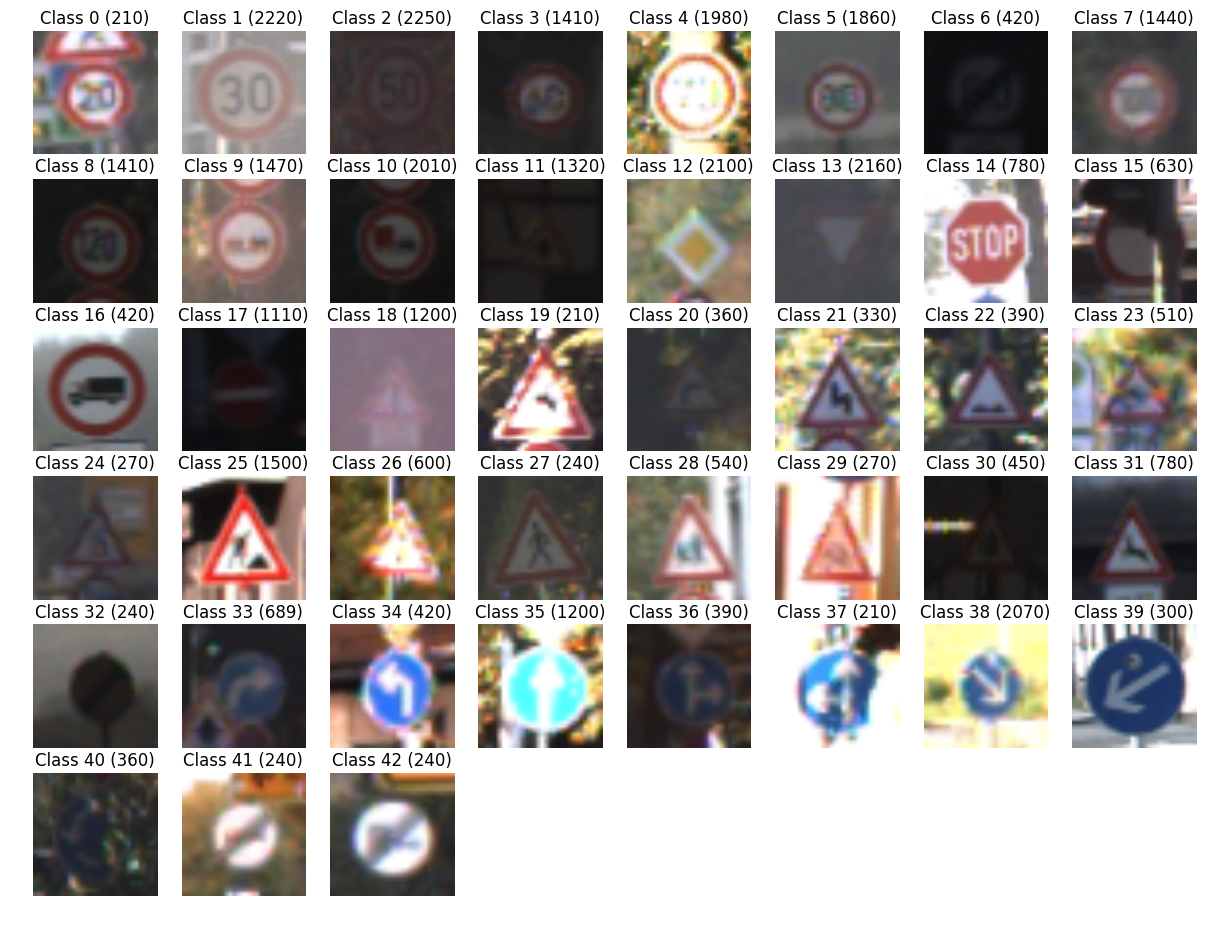

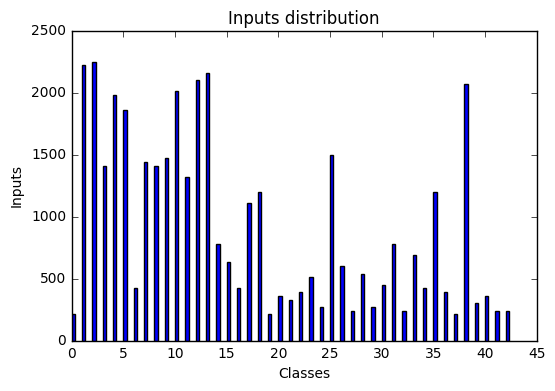

Data visualization complete


In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

def show_input_distribution(labels):
    train_labels = np.array(labels)
    inputs_per_class = np.bincount(train_labels)
    max_inputs = np.max(inputs_per_class)
    mpl_fig = plt.figure()
    ax = mpl_fig.add_subplot(111)
    ax.set_ylabel('Inputs')
    ax.set_xlabel('Classes')
    ax.set_title('Inputs distribution')
    ax.bar(range(len(inputs_per_class)), inputs_per_class, 1/3, color='blue', label='Inputs per class')
    plt.show()

def show_input_classes(images, labels):
    """Show first image of every label"""
    unique_labels = set(labels)
    plt.figure(figsize=(15, 15))
    i = 1
    for label in unique_labels:
        # Pick the first image for each label.
        idx = np.where(labels==label)[0][0]
        image = images[idx]
        plt.subplot(8, 8, i)  # A grid of 8 rows x 8 columns
        plt.axis('off')
        count = (labels==label).sum()
        plt.title("Class {0} ({1})".format(label, count))
        i += 1
        _ = plt.imshow(image)
    plt.show()

# Visualize data    
#print('Input classes:')
show_input_classes(X_train, y_train)
show_input_distribution(y_train)                
print('Data visualization complete')

In [4]:
### Generate additional data for underrepresented classes
import scipy.ndimage

def add_rotated_inputs(images, labels): 
    train_features = np.array(images)
    train_labels = np.array(labels)
    inputs_per_class = np.bincount(train_labels)
    max_inputs = np.max(inputs_per_class)
    print('Generating additional data for underrepresented classes...')
    angles = [-5, 5, -10, 10, -15, 15, -20, 20]
    for i in range(len(inputs_per_class)):
        input_ratio = min(int(max_inputs / inputs_per_class[i]) - 1, len(angles) - 1)
        if input_ratio <= 1:
            continue
        new_features = []
        new_labels = []
        mask = np.where(train_labels == i)
        for j in range(input_ratio):
            for feature in train_features[mask]:
                new_features.append(scipy.ndimage.rotate(feature, angles[j], reshape=False))
                new_labels.append(i)
        train_features = np.append(train_features, new_features, axis=0)
        train_labels = np.append(train_labels, new_labels, axis=0)
        print('Class',i, ', added', len(new_features),'new images')
    return train_features, train_labels
    
train_features, train_labels = add_rotated_inputs(X_train, y_train)

print('Extended train_features:', len(train_features))
print('Extended train_labels:', len(train_labels))

Generating additional data for underrepresented classes...
Class 0 , added 1470 new images
Class 6 , added 1680 new images
Class 15 , added 1260 new images
Class 16 , added 1680 new images
Class 19 , added 1470 new images
Class 20 , added 1800 new images
Class 21 , added 1650 new images
Class 22 , added 1560 new images
Class 23 , added 1530 new images
Class 24 , added 1890 new images
Class 26 , added 1200 new images
Class 27 , added 1680 new images
Class 28 , added 1620 new images
Class 29 , added 1890 new images
Class 30 , added 1800 new images
Class 32 , added 1680 new images
Class 33 , added 1378 new images
Class 34 , added 1680 new images
Class 36 , added 1560 new images
Class 37 , added 1470 new images
Class 39 , added 1800 new images
Class 40 , added 1800 new images
Class 41 , added 1680 new images
Class 42 , added 1680 new images
Extended train_features: 78117
Extended train_labels: 78117


In [5]:
### Normalize train set
print('Normalizing train features...')
train_features = train_features / 255. * 0.9 + 0.1

### Shuffle train set
from sklearn.utils import shuffle
train_features, train_labels = shuffle(train_features, train_labels)

### Split the data into training/validation sets.
from sklearn.model_selection import train_test_split
train_features, valid_features, train_labels, valid_labels = train_test_split(
   train_features,
   train_labels,
   test_size=0.2,
   random_state=12345
)
print('traing features', len(train_features))
print('validation features', len(valid_features))
print('Data preprocessed')

Normalizing train features...
traing features 62493
validation features 15624
Data preprocessed


### Visualizing prepared data set


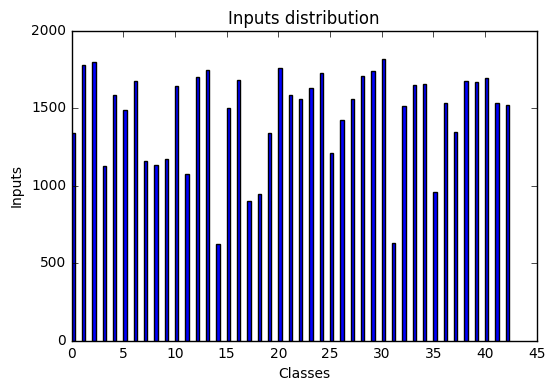

In [6]:
### Visualize preprocessed data    
show_input_distribution(train_labels)                
#show_input_classes(train_features, train_labels)

----

## Step 3: Designing and Testing the Model Architecture

We choose the LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81)
since it provides a good performance for recognizing traffic signs.

In [7]:
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    conv1 = tf.nn.relu(conv1)
    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    conv2 = tf.nn.relu(conv2)
    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2) 
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b    
    # Activation.
    fc1    = tf.nn.relu(fc1)
    
    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    fc2    = tf.nn.relu(fc2)

    # Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

### Training pipeline
We define x as a placeholder for a batch of input images and y as a placeholder for a batch of output labels.
Then we create a training pipeline that uses the model to classify fraffic signs data. Finnaly we define evaluate function that computes the loss and accuracy of the model for a given dataset.


In [8]:
import tensorflow as tf

### Features and Labels
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

### Training Pipeline
rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

### Evaluate how well the loss and accuracy of the model for a given dataset. 
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples


## Step 4: Training the Model
We run the training data through the training pipeline to train the model. Before each epoch, we shuffle the training set. After each epoch, we measure the loss and accuracy of the validation set.

We save the model after training.

In [9]:
from sklearn.utils import shuffle

EPOCHS = 15
BATCH_SIZE = 128

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(train_features)
    
    print("Training...")
    for i in range(EPOCHS):
        train_features, train_labels = shuffle(train_features, train_labels)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = train_features[offset:end], train_labels[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(valid_features, valid_labels)
        print("EPOCH",(i+1),"Validation Accuracy = {:.3f}".format(validation_accuracy))
        
    saver.save(sess, 'lenet.ab')
    print("Model saved")

Training...
EPOCH 1 Validation Accuracy = 0.820
EPOCH 2 Validation Accuracy = 0.908
EPOCH 3 Validation Accuracy = 0.953
EPOCH 4 Validation Accuracy = 0.962
EPOCH 5 Validation Accuracy = 0.974
EPOCH 6 Validation Accuracy = 0.970
EPOCH 7 Validation Accuracy = 0.980
EPOCH 8 Validation Accuracy = 0.983
EPOCH 9 Validation Accuracy = 0.977
EPOCH 10 Validation Accuracy = 0.981
EPOCH 11 Validation Accuracy = 0.982
EPOCH 12 Validation Accuracy = 0.984
EPOCH 13 Validation Accuracy = 0.987
EPOCH 14 Validation Accuracy = 0.990
EPOCH 15 Validation Accuracy = 0.989
Model saved


## Step 5:  Test the Model
Once we are completely satisfied with the model, we evaluate the performance of the model on the test set.

In [10]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    #X_test = X_test / 255. * 0.9 + 0.1
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.910


### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

Plotting input set distribution I found that some classes were very underrepresented in the training data. So for these classes, I've generated additional data by rotating the pictures. Then I normalized and randomized the input.

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

I use 20% of the training data as validation data, which seemed enough to not overfit the data.
I didn't use the testing data until I got satisfying results with the network.


### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

I've chosen the LeNet-5 implementation since it provided a good performance for recognizing traffic signs from the test data.

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

I've used the Adam optimizer with a learning rate of 0.001, a batch size of 128 and 10 training epochs and hyperparameters: medium = 0, stdev = 0.1.
After multiple experiments on two EC2 GPU instances, the learning rate of 0.001 seemed to be good to learn fast enough without getting stuck in a local minimum. Multiple trial and error also applied for the batch size and the number of epochs.

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

I used LeNet network since the traffic signs are overall pretty simple in shape and color.
I tried to change LeNet dimensions and add more convolution networks but they didn't improve the results 
but increased the computation time.
I didn't use more than 15 epochs as the accuracy wasn't improving after that. I also wanted to keep the network light so training it wouldn't take too much time on AWS and the results are satisfying as is.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [17]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import matplotlib.image as mpimg

imgs = ['../images/20.png', '../images/80.png', '../images/exclamation.png', '../images/hochwasser.png', '../images/priority.png']
#imgs = ['../11.jpg', '../12.jpg', '../13.jpg', '../14.png', '../14.jpg']

new_input = []
for imgname in imgs:
    image = mpimg.imread(imgname)
    new_input.append(image)


### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

[[  9.99976158e-01   2.38159064e-05]
 [  8.18958640e-01   1.65965065e-01]
 [  9.99996066e-01   3.89653951e-06]
 [  9.99233603e-01   4.31193854e-04]
 [  1.00000000e+00   4.27601599e-08]]


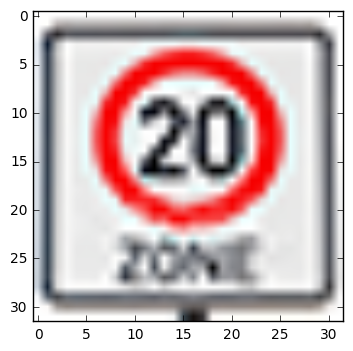

No entry
Speed limit (20km/h)


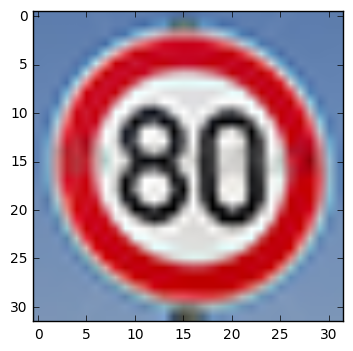

Speed limit (80km/h)
Speed limit (50km/h)


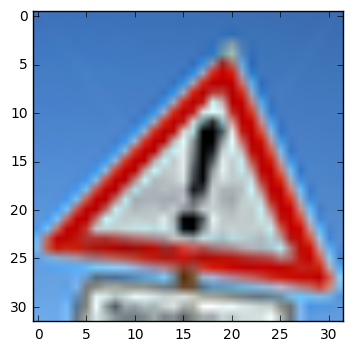

General caution
Traffic signals


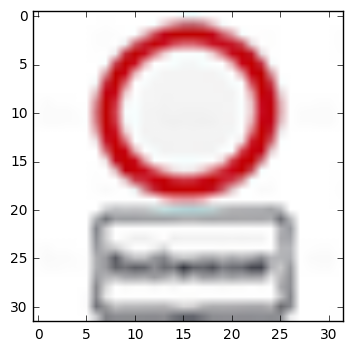

End of no passing
No passing for vehicles over 3.5 metric tons


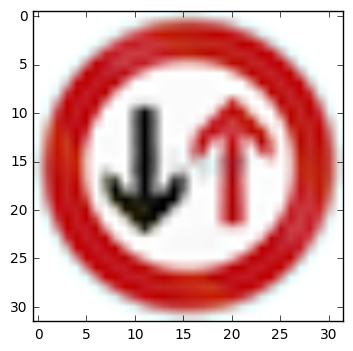

Speed limit (20km/h)
Speed limit (60km/h)


In [20]:
### Run the predictions here.
### Feel free to use as many code cells as needed.
prediction = tf.nn.softmax(logits)

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    values, indexes = sess.run(tf.nn.top_k(prediction, 2), feed_dict={x: new_input})
    print(values)

idx = 0;    
for img in new_input:
    plt.imshow(img)
    plt.show()
    i0 = str(indexes[idx][0])
    i1 = str(indexes[idx][1])
    print(sign_names[i0])
    print(sign_names[i1])
    idx += 1

We see that signs [3,4] were not recognized correctly.

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

In [21]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    values, indexes = sess.run(tf.nn.top_k(prediction, 2), feed_dict={x: new_input})
    print(indexes)
    print(values)
# The model predicted 4 out of 5 images correctly.

[[17  0]
 [ 5  2]
 [18 26]
 [41 10]
 [ 0  3]]
[[  9.99976158e-01   2.38159064e-05]
 [  8.18958640e-01   1.65965065e-01]
 [  9.99996066e-01   3.89653951e-06]
 [  9.99233603e-01   4.31193854e-04]
 [  1.00000000e+00   4.27601599e-08]]


### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

**Answer:**

In [ ]:
The model is pretty certain of all of its results. Prediction certainty after class 2 are meaningless so we don't analyze them.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.